In [1]:
# Exmaple from SHAP
# This codee has the purpose to figure out why my first implementation of svm was not working
# https://github.com/slundberg/shap/blob/master/docs/notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

/Users/johanneswidera/Uni/bachelorarbeit/Code/hugging-face/HUGGING_ENV/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/johanneswidera/Uni/bachelorarbeit/Code/hugging-face/HUGGING_ENV/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-

In [3]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)


vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [36]:
print(corpus_train[3:5])

["As a matter of fact, this is one of those movies you would have to give 7.5 to. The fact is; as already stated, it's a great deal of fun. Wonderfully atmospheric. Askey does indeed come across as over the top, but it's a great vehicle for him, just as Oh, Mr Porter is for Will hay. If you like old dark house movies and trains, then this is definitely for you.<br /><br />Strangely enough it's the kind of film that you'll want to see again and again. It's friendly and charming in an endearing sort of way with all of the nostalgic references that made great wartime fare. The 'odd' band of characters simply play off each other as they do in many another typical British wartime movie. It would have been wonderful to have seen this film if it had been recorded by Ealing studios . A real pity that the 1931 original has not survived intact\n", 'How could 4 out of 16 prior voters give this movie a 10? How could more than half the prior voters give it a 7 or higher? Who is voting here? I can o

In [9]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [41]:
print(X_train[0])

  (0, 99)	0.12586015128472647
  (0, 264)	0.0771061521871045
  (0, 358)	0.04272164247309938
  (0, 371)	0.030120263446353938
  (0, 426)	0.04919224004804844
  (0, 621)	0.0170327484640022
  (0, 657)	0.02430146968348238
  (0, 748)	0.13879098083596098
  (0, 750)	0.06259723311336944
  (0, 842)	0.02534479889595147
  (0, 847)	0.033849506530044565
  (0, 878)	0.05229518790331627
  (0, 943)	0.032727229151917045
  (0, 1022)	0.014868319904688341
  (0, 1383)	0.04081081464703596
  (0, 1425)	0.016249315566677667
  (0, 1469)	0.07928437331219824
  (0, 1470)	0.023978476199739182
  (0, 1503)	0.02696402191086473
  (0, 1608)	0.03279027755865055
  (0, 1648)	0.033809204824115625
  (0, 1820)	0.23325927279859693
  (0, 1843)	0.03925018317310734
  (0, 2040)	0.05634359449672744
  (0, 2152)	0.027439787911267197
  :	:
  (0, 15167)	0.038129132971954346
  (0, 15195)	0.041256377346642635
  (0, 15430)	0.0956682510729385
  (0, 15479)	0.0868568974060896
  (0, 15509)	0.021254169490921078
  (0, 15676)	0.04249940696502388
  (

In [21]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


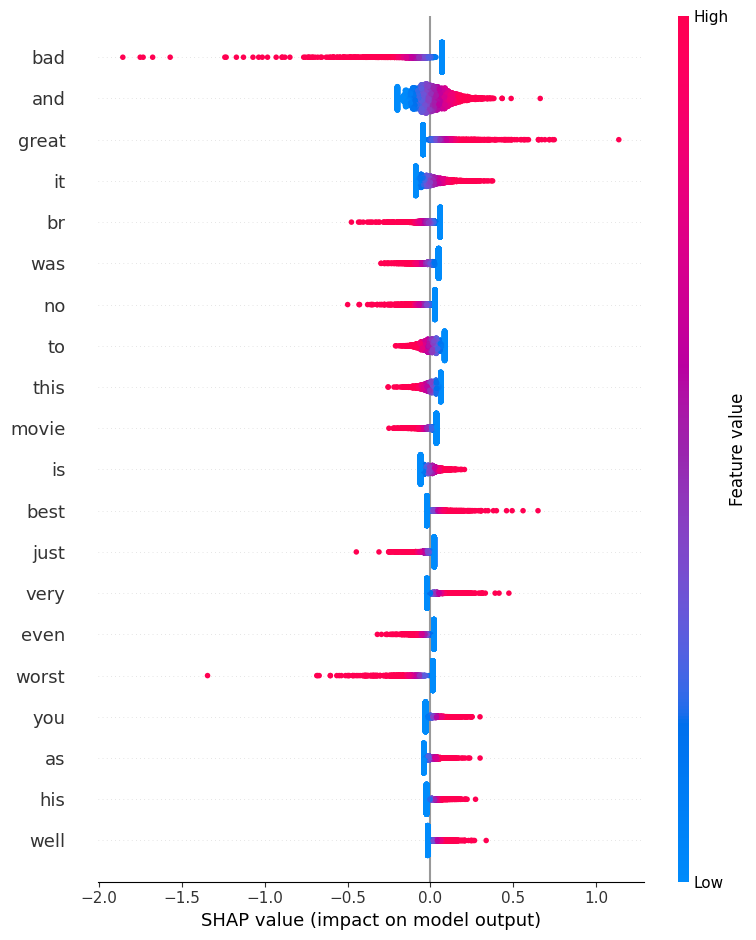

In [18]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names_out())

# Investigate whats the format is




### 1. data



In [22]:
print(corpus[:3])
print(y[:3])

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.\n", "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son

# 2. Vectorized


In [23]:
print(X_train[:3])

  (0, 6087)	0.018152575353292216
  (0, 7945)	0.06072983700005768
  (0, 3235)	0.050966653396980394
  (0, 3888)	0.04313536016883736
  (0, 16345)	0.07049477961619771
  (0, 12871)	0.052468535253620906
  (0, 6613)	0.06267944250131276
  (0, 1383)	0.04081081464703596
  (0, 6530)	0.024495339836017312
  (0, 1470)	0.023978476199739182
  (0, 3430)	0.025112793850180285
  (0, 6448)	0.12105373735714013
  (0, 15955)	0.025089013963364493
  (0, 14701)	0.025613900617365147
  (0, 14467)	0.044111250034168804
  (0, 14302)	0.040682771087790254
  (0, 12724)	0.05939987556066256
  (0, 10929)	0.03566013379045114
  (0, 1503)	0.02696402191086473
  (0, 10893)	0.07173345641891997
  (0, 10344)	0.019155552930897338
  (0, 9722)	0.03488953115069044
  (0, 14143)	0.040148673542406726
  (0, 2549)	0.05378552408645586
  (0, 842)	0.02534479889595147
  :	:
  (2, 2152)	0.022331997036701676
  (2, 5702)	0.0664750122922586
  (2, 10229)	0.024518826023479028
  (2, 10236)	0.01751632662046273
  (2, 14710)	0.04637803776724803
  (2, 14

# Train SVM with same Data

In [25]:
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy

NameError: name 'accuracy_score' is not defined

In [26]:
# accuracy score
from sklearn.metrics import accuracy_score

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  88.42


In [54]:

SVM.predict('hallo welt')


ValueError: could not convert string to float: 'hallo welt'

In [1]:
shap_values = explainer(X_test, max_evals=32833)
X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions

NameError: name 'explainer' is not defined

# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train.toarray(), y_train)

RandomForestClassifier()

In [59]:

feature_names = vectorizer.get_feature_names_out()
explainer = shap.Explainer(model, X_train.toarray(), feature_names=feature_names)

In [60]:
shap_values = explainer(X_test.toarray())

100%|===================| 9998/10000 [14:12<00:00]        

In [61]:
# for more details: https://medium.com/nlplanet/two-minutes-nlp-explain-predictions-with-shap-values-2a0e34219177
shap.initjs()

ind = 6
print(corpus_test[ind])
# Just okay film about a woman who is a twin having disturbing visions of her sister in danger back at home.
#  She then returns home to find all is not well and that she is going to have to find out what happened to her 
# sister and why.<br /><br />This is the sort of thing that kind of almost works but doesn't quite. I can't really put
#  my finger on why it didn't work but it was good enough that I kind of wished it was better, or at least had gotten 
# the little things right- like having the girls who play the twins in the flashbacks be closer in size.
# I think perhaps thats whats 
# wrong with it there are lots of little things that just are wrong.




Just okay film about a woman who is a twin having disturbing visions of her sister in danger back at home. She then returns home to find all is not well and that she is going to have to find out what happened to her sister and why.<br /><br />This is the sort of thing that kind of almost works but doesn't quite. I can't really put my finger on why it didn't work but it was good enough that I kind of wished it was better, or at least had gotten the little things right- like having the girls who play the twins in the flashbacks be closer in size. I think perhaps thats whats wrong with it there are lots of little things that just are wrong.



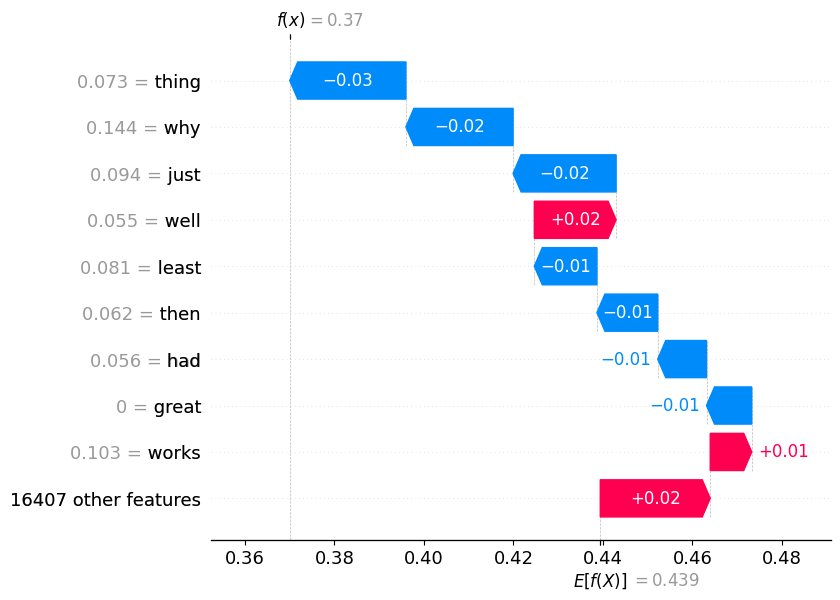

In [64]:
shap.plots.waterfall(shap_values[ind,:,1]) # Klassifizierung 1 = positiv

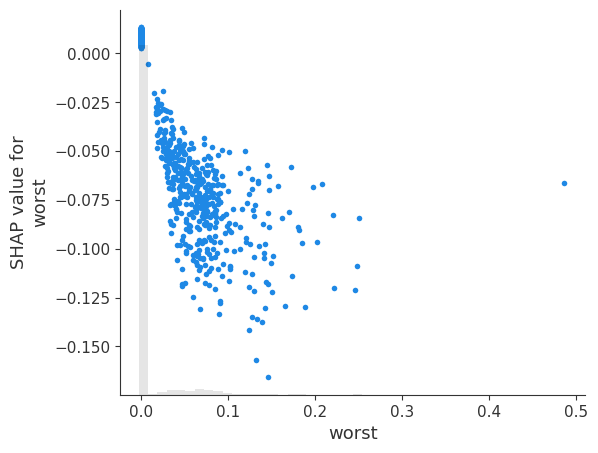

In [67]:

shap.plots.scatter(shap_values[:,feature_names.tolist().index("worst"),1])

The X-AXis represents the Tf-IDF Score. Every time when the score is above 0 -> When the word "worst" is present the SHAP value has a negative impact on the result


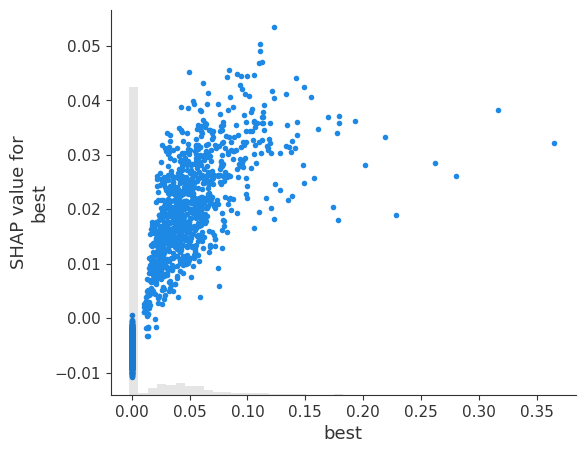

In [68]:
shap.plots.scatter(shap_values[:,feature_names.tolist().index("best"),1])

1575


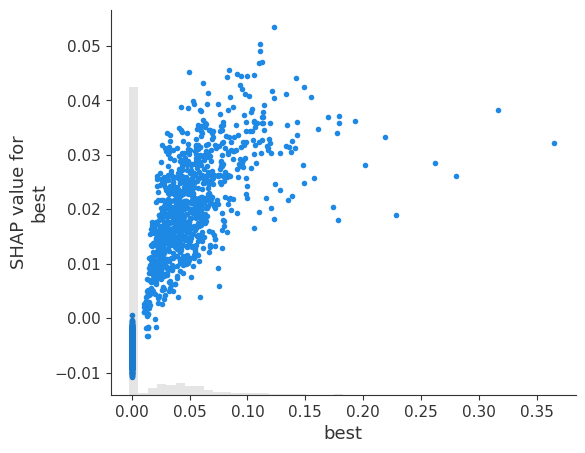

In [71]:
print(feature_names.tolist().index("best"))
shap.plots.scatter(shap_values[:,1575,1])

# Was heisst der obere Ausdruck
# [X_test_array, feature_names=vectorizer.get_feature_names()]
# das komplette test arrray an der stelle 1575 also das wort best
# impact auf die klassifizierung 1 = positiv